In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from glob import glob

In [3]:
def transform(val):
    if not val:
        return 0
    if val[-1] == "}":
        val = val[:-1]
    if "{" in val:
        val = val.split("{")[1]
    return int(val.split(':')[1])
vtransform = pd.np.frompyfunc(transform, 1, 1)

def read_log(file):
    df = pd.read_csv(f, sep=",", header=None, skiprows=2, skipfooter=1)
    df.index = ["Binary", "Positions"]
    df[:] = vtransform(df.values[:,:])
    return df

In [4]:
files = glob("/home/ucyo/rust/pzip/data/icon-data/bits_distribution/icon.ml*.log")

In [5]:
result = []
for f in files:
    df = pd.read_csv(f, sep=",", header=None, skiprows=2, skipfooter=1)
    df.index = ["Binary", "Positions"]
    df[:] = vtransform(df.values[:,:])
    binary = (df.loc['Binary',:]/df.loc['Binary',1]*100)
    binary.name = f.rsplit("/", 1)[1]
    result += [binary]

/home/ucyo/Environments/infospace/lib/python3.6/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
df = pd.concat(result, axis=1)

In [7]:
import seaborn as sns
from matplotlib import pyplot as plt

/home/ucyo/Environments/infospace/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


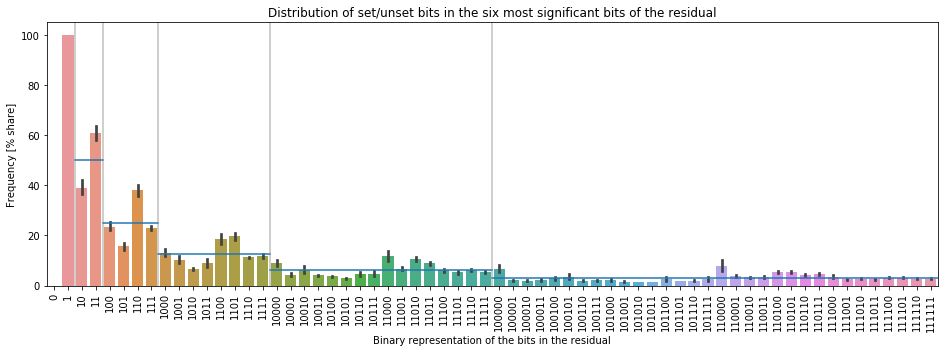

In [8]:
fig, ax = plt.subplots(figsize=(13.27,5))
bp = sns.barplot(ax=ax,data=df.T)
for item in bp.get_xticklabels():
    item.set_rotation(90)
plt.xticks(pd.np.arange(64), [bin(x)[2:] for x in pd.np.arange(64)]);
plt.axhline(50, 0.03125, .0625);
plt.axhline(25, .0625,.125);
plt.axhline(12.5, .125, .25);
plt.axhline(6.25, .25, .5);
plt.axhline(3.125, .5, 1);
plt.title(f);
plt.axvline(1.5, color='gray', alpha=.5);
plt.axvline(3.5, color='gray', alpha=.5);
plt.axvline(7.5, color='gray', alpha=.5);
plt.axvline(15.5, color='gray', alpha=.5);
plt.axvline(31.5, color='gray', alpha=.5);
plt.title("Distribution of set/unset bits in the six most significant bits of the residual")
plt.xlabel("Binary representation of the bits in the residual")
plt.ylabel("Frequency [% share]")
plt.tight_layout()
# plt.savefig("/home/ucyo/Developments/encoding-paper/pics/bitsets.pdf")
plt.show()

In [9]:
files

['/home/ucyo/rust/pzip/data/icon-data/bits_distribution/icon.ml.pv.f32.little.4x90x351x901_3.log',
 '/home/ucyo/rust/pzip/data/icon-data/bits_distribution/icon.ml.qc.f32.little.4x90x351x901_3.log',
 '/home/ucyo/rust/pzip/data/icon-data/bits_distribution/icon.ml.temp.f32.little.4x90x351x901_1.log',
 '/home/ucyo/rust/pzip/data/icon-data/bits_distribution/icon.ml.tempv.f32.little.4x90x351x901_0.log',
 '/home/ucyo/rust/pzip/data/icon-data/bits_distribution/icon.ml.temp.f32.little.4x90x351x901_3.log',
 '/home/ucyo/rust/pzip/data/icon-data/bits_distribution/icon.ml.qv.f32.little.4x90x351x901_0.log',
 '/home/ucyo/rust/pzip/data/icon-data/bits_distribution/icon.ml.qi.f32.little.4x90x351x901_0.log',
 '/home/ucyo/rust/pzip/data/icon-data/bits_distribution/icon.ml.vor.f32.little.4x90x351x901_2.log',
 '/home/ucyo/rust/pzip/data/icon-data/bits_distribution/icon.ml.pv.f32.little.4x90x351x901_1.log',
 '/home/ucyo/rust/pzip/data/icon-data/bits_distribution/icon.ml.tempv.f32.little.4x90x351x901_1.log',